# Linear Regression Error and Accuracy Metrics

In [32]:
# Import libraries and dependencies
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Import Data

In [33]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/weather_data_austin_2010.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [34]:
# Slice data
df = df.loc['2010 May':'2010 Jul']
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-05-01 00:00:00,67.6,60.9,1.0
2010-05-01 01:00:00,66.4,61.0,1.0
2010-05-01 02:00:00,65.6,60.6,1.0
2010-05-01 03:00:00,65.0,60.4,1.0
2010-05-01 04:00:00,64.7,60.4,1.0


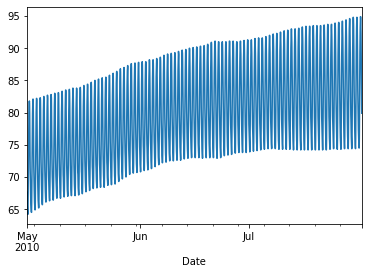

In [35]:
# Plot temperature
df['Temperature'].plot()

# Set Features (X) and Target (y)

In this example, we want to use the week of the year to predict the temperature

In [38]:
# Create a DataFrame of the input features (X)
# Export the Temperature column as a DataFrame
X = df['Temperature'].to_frame()
print(f"X has {X.shape[0]} rows and {X.shape[1]} column of data.")
X.head()

X has 2208 rows and 1 column of data.


,Temperature
Date,
2010-05-01 00:00:00,67.6
2010-05-01 01:00:00,66.4
2010-05-01 02:00:00,65.6
2010-05-01 03:00:00,65.0
2010-05-01 04:00:00,64.7


In [39]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()

,Temperature,Week_of_Year
Date,,
2010-05-01 00:00:00,67.6,17
2010-05-01 01:00:00,66.4,17
2010-05-01 02:00:00,65.6,17
2010-05-01 03:00:00,65.0,17
2010-05-01 04:00:00,64.7,17


In [41]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Temperature,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30
Date,,,,,,,,,,,,,,,
2010-05-01 00:00:00,67.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 01:00:00,66.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 02:00:00,65.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 03:00:00,65.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 04:00:00,64.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# The target Temperature column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop('Temperature', axis=1)
X_binary_encoded.head()

,Week_of_Year_17,Week_of_Year_18,Week_of_Year_19,Week_of_Year_20,Week_of_Year_21,Week_of_Year_22,Week_of_Year_23,Week_of_Year_24,Week_of_Year_25,Week_of_Year_26,Week_of_Year_27,Week_of_Year_28,Week_of_Year_29,Week_of_Year_30
Date,,,,,,,,,,,,,,
2010-05-01 00:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 01:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 02:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 03:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-05-01 04:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# The target for our model is to predict the Temperature
y = df['Temperature'].copy()

# Linear Regression

In [44]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the temperature using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

# Evaluating the Model

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 1.0, r2: 1.0


In [47]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse
model.coef_

array([ 1.00000000e+00, -3.17952188e-15, -1.46773944e-16, -2.15577857e-16,
        1.76589539e-15,  1.53847939e-16, -2.21800595e-16, -5.42108089e-16,
        3.25188052e-16,  3.70647653e-16,  3.21632979e-16,  3.76702146e-16,
        3.39558751e-16,  3.59483595e-16,  2.92825858e-16])

In [49]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

9.672939729950632e-15

In [50]:
# Standard deviation of the temperature
np.std(y)

7.304854998693154

# Plotting the Regression Line

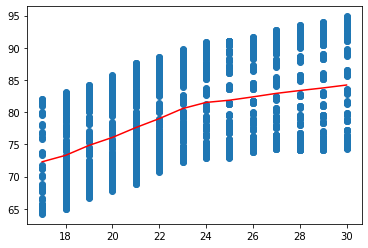

In [30]:
# Plot the regression line
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')